
![](https://i.imgur.com/KhDDHls.gif)

<div style="color: #1F1F1F; display: fill;
            border-radius: 10px;
            background-color: #E0F7FA;
            font-size: 100%;
            font-family: Verdana;">

<p style="padding: 15px; color: #004D40; font-weight: bold; line-height: 1.8;">
    <h2> Problem Statement: </h2>
    <b> Retail businesses accumulate vast amounts of data across multiple channels, but often struggle to analyze it effectively to identify emerging trends, customer preferences, and seasonal buying patterns. This inability to harness data insights can lead to lost revenue, inventory imbalances, ineffective marketing, and a reduced competitive edge. This project aims to analyze shopping data to uncover trends, optimize inventory management, enhance marketing strategies, and improve overall retail operations.<b>
</p>
</div>


<div style="color: #1F1F1F; display: fill;
            border-radius: 10px;
            background-color: #E0F7FA;
            font-size: 100%;
            font-family: Verdana;">

<p style="padding: 15px; color: #004D40; font-weight: bold; line-height: 1.8;">
    <h2> About Dataset: </h2>
  <ul>
    🆔 <b>Customer ID</b> - Unique identifier for each customer.<br>
    🎂 <b>Age</b> - Age of the customer.<br>
    👤 <b>Gender</b> - Gender of the customer (Male/Female).<br>
    🛍️ <b>Item Purchased</b> - The item purchased by the customer.<br>
    📂 <b>Category</b> - Category of the item purchased.<br>
    💵 <b>Purchase Amount (USD)</b> - The amount of the purchase in USD.<br>
    📍 <b>Location</b> - Location where the purchase was made.<br>
    📏 <b>Size</b> - Size of the purchased item.<br>
    🎨 <b>Color</b> - Color of the purchased item.<br>
    ❄️ <b>Season</b> - Season during which the purchase was made.<br>
    ⭐ <b>Review Rating</b> - Rating given by the customer for the purchased item.<br>
    🔔 <b>Subscription Status</b> - Indicates if the customer has a subscription (Yes/No).<br>
    🚚 <b>Shipping Type</b> - Type of shipping chosen by the customer.<br>
    🏷️ <b>Discount Applied</b> - Indicates if a discount was applied to the purchase (Yes/No).<br>
    🎟️ <b>Promo Code Used</b> - Indicates if a promo code was used for the purchase (Yes/No).<br>
    🔄 <b>Previous Purchases</b> - Number of previous purchases made by the customer.<br>
    💳 <b>Payment Method</b> - Customer's most preferred payment method.<br>
    📅 <b>Frequency of Purchases</b> - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly).<br>
  </ul>
</p>
</div>


# Objective  

The primary objective of the project is to explore and analyze the shopping trends dataset to derive actionable insights into customer behavior and purchasing patterns. Specific objectives include:

1. To analyze the overall distribution of customer ages within the dataset.
2. To determine how the average purchase amount varies across different product categories.
3. To identify which gender has the highest number of purchases.
4. To find the most commonly purchased items in each product category.
5. To examine if there are specific seasons or months where customer spending is significantly higher.
6. To calculate the average rating given by customers for each product category.
7. To identify any notable differences in purchase behavior between subscribed and non-subscribed customers.
8. To determine the most popular payment methods used by customers.
9. To analyze if customers using promo codes tend to spend more than those who don’t.
10. To explore how the frequency of purchases varies across different age groups.
11. To investigate any correlations between the size of the product and the purchase amount.
12. To identify which shipping types are preferred by customers for different product categories.
13. To assess how the presence of a discount influences customer purchase decisions.
14. To examine if there are any specific colors that are more popular among customers.
15. To calculate the average number of previous purchases made by customers.
16. To analyze how the purchase amount differs based on the review ratings given by customers.
17. To identify any noticeable differences in purchase behavior between different locations.
18. To explore the relationship between customer age and the category of products they purchase.
19. To examine how the average purchase amount differs between male and female customers.
20. To identify any noticeable trends in repeat purchases or brand loyalty.
21. Which group of customers purchases the most expensive items?
22. Identify Key Factors Driving Purchase Amounts.

By achieving these objectives, the project aims to provide insights that can help retailers optimize inventory management, improve marketing strategies, enhance customer experience, and boost overall business performance.

# Step 1| Import Libararies

In [1]:
# Import Dataset
import numpy as np  
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px        
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

# Step 2| Load the Dataset 

In [2]:
# Reading the data set
shop = pd.read_csv('/kaggle/input/shopping-trends-updated-csv/shopping_trends_updated.csv')

# Step 3 | Exploratory Data Analysis( EDA )

In [3]:
shop.shape

(3900, 18)

In [4]:
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
shop.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [6]:
# Coumns
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [7]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
shop.shape

(3900, 18)

In [9]:
shop.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [10]:
columns_to_check = [
    'Gender', 
    'Category', 
    'Size', 
    'Subscription Status', 
    'Shipping Type', 
    'Discount Applied', 
    'Promo Code Used', 
    'Payment Method'
]

for column in columns_to_check:
    print(f"{column}: {shop[column].unique()}")


Gender: ['Male' 'Female']
Category: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']
Size: ['L' 'S' 'M' 'XL']
Subscription Status: ['Yes' 'No']
Shipping Type: ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']
Discount Applied: ['Yes' 'No']
Promo Code Used: ['Yes' 'No']
Payment Method: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


## OBSERVATION:

Upon an initial examination of the dataset, we can confirm that it is comprehensive and well-structured, comprising 3900 rows and 18 columns. Notably, the data is complete with no missing values, which gives us confidence in proceeding with further analysis.

Let's explore the significance of each column in understanding customer behavior and preferences:

- **Customer ID:** This column serves as a unique identifier for each customer, allowing us to distinguish between individuals for analysis.
  
- **Age:** This column provides insights into the age demographics of our customers, which will help us understand the preferences and behaviors of different age groups.
  
- **Gender:** By analyzing the gender column, we can identify any significant buying patterns or preferences based on gender, aiding in more targeted insights.

- **Item Purchased:** This column reveals the specific products customers have purchased, helping us identify the most popular items and potential trends in product selection.
  
- **Category:** The category column organizes products into groups such as clothing, footwear, and more. This segmentation allows us to study trends and performance across specific product categories.

- **Purchase Amount (USD):** This column highlights the amount spent by customers, enabling us to analyze spending habits and identify high-value customers or products.

- **Location:** The location data indicates where customers are based geographically. This helps uncover regional trends, preferences, and possible variations in purchasing patterns.

- **Size:** This column denotes the size of the purchased products, which assists in understanding customer preferences regarding product size across different categories.

- **Color:** By evaluating the color column, we can analyze customer preferences for specific colors, helping us understand trends in aesthetic choices.

- **Season:** The season column provides valuable insights into the time of year customers made their purchases, allowing us to identify seasonal shopping trends.

- **Review Rating:** This column shows the ratings given by customers to their purchased products. It offers feedback on customer satisfaction, which can influence future product offerings or marketing strategies.

- **Subscription Status:** The subscription status column indicates whether customers have subscribed to a service. This helps assess customer loyalty and engagement with subscription-based offerings.

- **Shipping Type:** This column outlines the various shipping methods used by customers. It gives insights into their preferred shipping options and any trends regarding delivery speed or cost preferences.

- **Discount Applied:** This column identifies whether a discount was applied to the purchase, helping us evaluate how discounts impact customer purchasing decisions and overall sales.

- **Promo Code Used:** By analyzing whether promo codes were used, we can gauge the effectiveness of promotional campaigns and customer response to discounts or special offers.

- **Previous Purchases:** This column reveals the number of previous purchases made by customers, offering insights into customer retention, loyalty, and repeat business.

- **Payment Method:** The payment method column displays the variety of payment options used by customers, which helps us understand their preferences in completing transactions.

- **Frequency of Purchases:** This column tracks the frequency with which customers make purchases, enabling us to identify habitual shoppers and potential for cross-selling or upselling.

---

With this diverse and rich dataset, we are well-positioned to uncover valuable insights that will drive informed decision-making. By exploring customer preferences, identifying shopping trends, and understanding their behaviors, we can enhance customer experiences and tailor our strategies to meet their needs more effectively. Let's begin this exciting analytical journey!

## 1. What is the overall distribution of customer ages in the dataset?

In [11]:
shop['Age'].value_counts()

Age
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

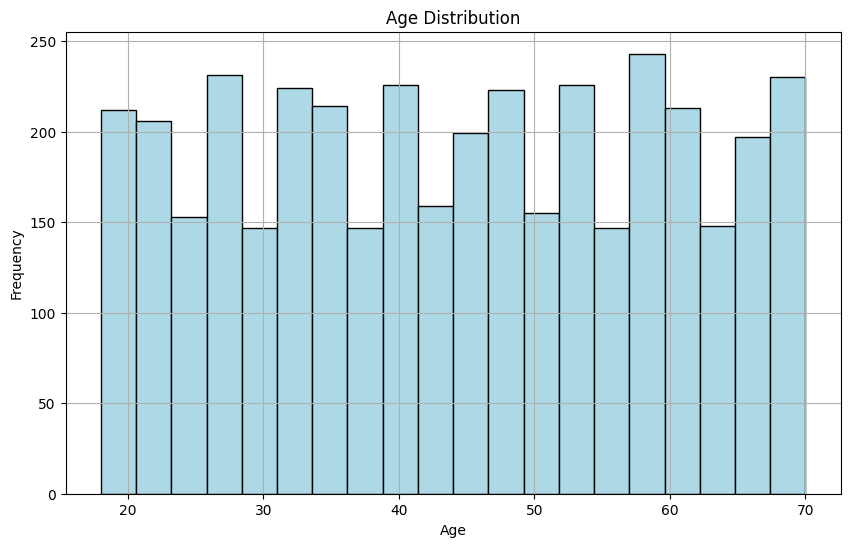

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(shop['Age'], bins=20, edgecolor='black', color='#ADD8E6')  
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
shop['Age'].mean()

44.06846153846154

In [14]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
shop['Age_category'] = pd.cut(shop['Age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults'                                                                      , 'old'] )

In [16]:
fig = px.histogram(shop, y='Age', x='Age_category', color_discrete_sequence=['#ADD8E6'])
fig.update_layout(title='Age Distribution by Age Category')
fig.show()

## 2. How does the average purchase amount vary across different product categories?

In [17]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [18]:
shop[['Category','Purchase Amount (USD)']]

,Category,Purchase Amount (USD)
0,Clothing,53
1,Clothing,64
2,Clothing,73
3,Footwear,90
4,Clothing,49
...,...,...
3895,Clothing,28
3896,Accessories,49
3897,Accessories,33
3898,Footwear,77


In [19]:
shop.groupby('Category')['Purchase Amount (USD)'].sum()

Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64

In [20]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

## 3. Which gender has the highest number of purchases?

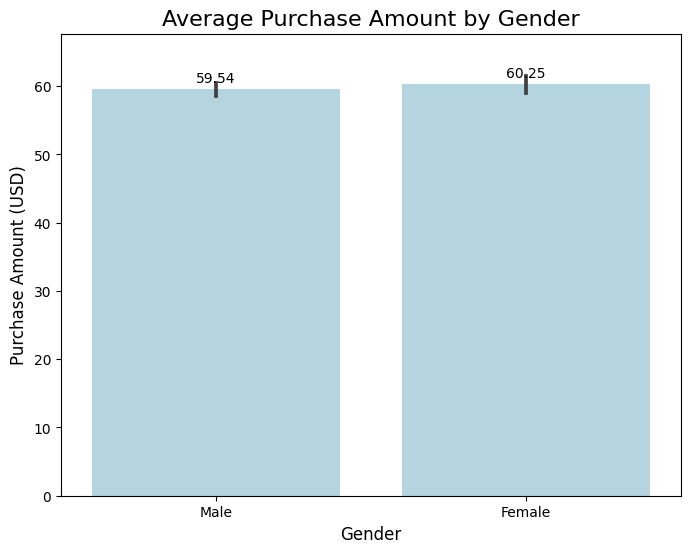

In [21]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=shop, x='Gender', y='Purchase Amount (USD)', palette=['#ADD8E6'])

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.title('Average Purchase Amount by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.margins(y=0.1)

plt.show()

## 4. What are the most commonly purchased items in each category?

In [22]:
shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Sunglasses        161
             Belt              161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Pants             171
             Blouse            171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

In [23]:
fig = px.histogram(shop, x='Item Purchased', color='Category', color_discrete_sequence=px.colors.qualitative.Set2)  
fig.update_layout(title='Item Purchased Distribution by Category')
fig.show()

## 5. Are there any specific seasons or months where customer spending is significantly higher?

In [24]:
shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [25]:
shop['Season'].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

In [26]:
fig = px.histogram(shop , x = 'Season' , range_y= [800 , 1200], color_discrete_sequence=['#ADD8E6'])
fig.update_layout(title='Distribution of Purchases by Season')
fig.show()

## 6. What is the average rating given by customers for each product category?

In [27]:
shop.groupby('Category')['Review Rating'].mean()

Category
Accessories    3.768629
Clothing       3.723143
Footwear       3.790651
Outerwear      3.746914
Name: Review Rating, dtype: float64

In [28]:
shop_groupby = shop.groupby('Category')['Review Rating'].mean().reset_index()
print(shop_groupby)

      Category  Review Rating
0  Accessories       3.768629
1     Clothing       3.723143
2     Footwear       3.790651
3    Outerwear       3.746914


In [29]:
fig = px.bar(shop_groupby, x='Category', y='Review Rating', color_discrete_sequence=['#ADD8E6'])
fig.update_layout(title='Average Review Rating by Category')
fig.show()

## 7. Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?

In [30]:
shop['Subscription Status'].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

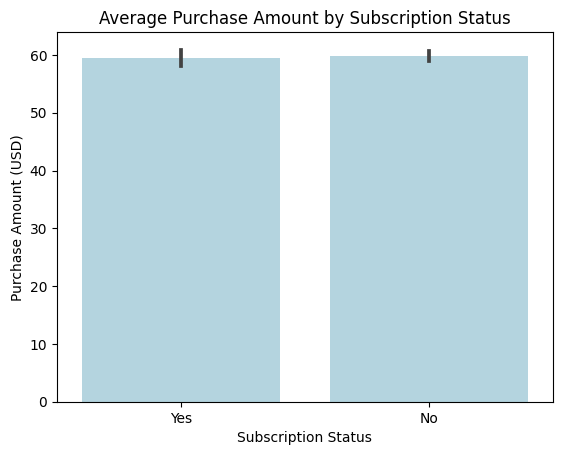

In [31]:
sns.barplot(shop  , x = 'Subscription Status' , y = 'Purchase Amount (USD)', palette=['#ADD8E6']) 
plt.title('Average Purchase Amount by Subscription Status')
plt.show()

In [32]:
shop['Purchase Amount (USD)'].sum()

233081

In [33]:
shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

## 8. Which payment method is the most popular among customers?

In [34]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

Payment Method
Debit Card       60.915094
Credit Card      60.074516
Bank Transfer    59.712418
Cash             59.704478
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64

In [35]:
shop_groupby = shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

In [36]:
fig = px.bar(shop_groupby , x = 'Payment Method' , y = 'Purchase Amount (USD)',color_discrete_sequence=['#ADD8E6'])
fig.update_layout(title='Average Purchase Amount by Payment Method')
fig.show()

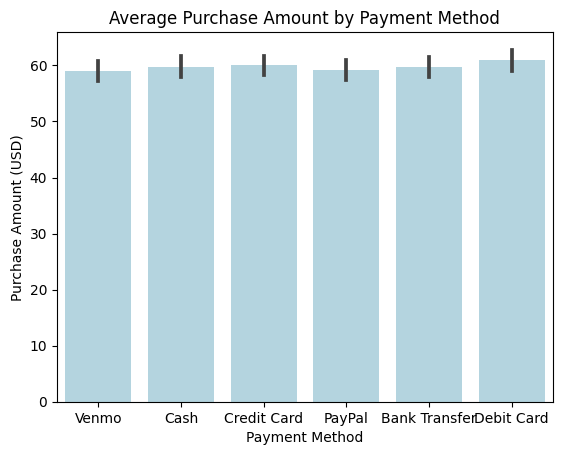

In [37]:
sns.barplot(shop, x='Payment Method', y='Purchase Amount (USD)', palette=['#ADD8E6'])
plt.title('Average Purchase Amount by Payment Method')
plt.show()

## 9. Do customers who use promo codes tend to spend more than those who don't?

In [38]:
shop_groupby  = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

In [39]:
fig = px.sunburst(shop, path=['Gender', 'Promo Code Used'], values='Purchase Amount (USD)')
fig.update_layout(title='Purchase Amount Distribution by Gender and Promo Code Used')
fig.show()

In [40]:
fig = px.bar(shop_groupby, x='Promo Code Used', y='Purchase Amount (USD)', color_discrete_sequence=['#ADD8E6'])
fig.update_layout(title='Average Purchase Amount by Promo Code Used')
fig.show()


## 10. How does the frequency of purchases vary across different age groups?

In [41]:
shop[['Age' , 'Age_category']]

,Age,Age_category
0,55,old
1,19,Young Adults
2,50,Middle-Aged Adults
3,21,Young Adults
4,45,Middle-Aged Adults
...,...,...
3895,40,Middle-Aged Adults
3896,52,old
3897,46,Middle-Aged Adults
3898,44,Middle-Aged Adults


In [42]:
shop['Age_category'].unique()

['old', 'Young Adults', 'Middle-Aged Adults', 'teen']
Categories (5, object): ['child' < 'teen' < 'Young Adults' < 'Middle-Aged Adults' < 'old']

In [43]:
shop_group = shop.groupby('Frequency of Purchases')['Age'].sum()

In [44]:
fig = px.sunburst(shop, path=['Frequency of Purchases', 'Age_category'], values='Age')
fig.update_layout(title='Age Distribution by Frequency of Purchases and Age Category')
fig.show()

## 11. Are there any correlations between the size of the product and the purchase amount?

In [45]:
shop_group = shop.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

In [46]:
fig = px.bar(shop_group, x='Size', y='Purchase Amount (USD)', color_discrete_sequence=['#ADD8E6'])
fig.update_layout(title='Purchase Amount Distribution by Size')
fig.show()

## 12. Which shipping type is preferred by customers for different product categories?

In [47]:
shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending= False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

In [48]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

## 13. How does the presence of a discount affect the purchase decision of customers?

In [49]:
shop_group = shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

In [50]:
fig = px.histogram(shop_group, x='Discount Applied', y='Purchase Amount (USD)', color_discrete_sequence=['#ADD8E6'])
fig.update_layout(title='Purchase Amount Distribution by Discount Applied')
fig.show()


In [51]:
fig = px.sunburst(shop, path=['Gender', 'Discount Applied'], values='Purchase Amount (USD)', 
                  color='Gender')
fig.update_layout(title='Purchase Amount Distribution by Gender and Discount Applied')
fig.show()

## 14. Are there any specific colors that are more popular among customers?

In [52]:
fig = px.histogram(shop, x='Color', color_discrete_sequence=['#ADD8E6'])
fig.update_layout(title='Color Distribution of Products')
fig.show()

In [53]:
shop['Color'].value_counts().nlargest(5)

Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64

## 15. What is the average number of previous purchases made by customers?

In [54]:
shop['Previous Purchases'].mean()

25.35153846153846

## 16. How does the purchase amount differ based on the review ratings given by customers?

In [55]:
purchase_amount_by_rating = shop.groupby('Review Rating')['Purchase Amount (USD)'].mean().reset_index()
purchase_amount_by_rating = purchase_amount_by_rating.sort_values(by='Purchase Amount (USD)', ascending=False)

print(purchase_amount_by_rating)

    Review Rating  Purchase Amount (USD)
25            5.0              64.352941
24            4.9              63.885542
0             2.5              62.287879
16            4.1              61.959459
23            4.8              61.881944
7             3.2              61.315789
13            3.8              60.873239
17            4.2              60.853801
5             3.0              60.728395
19            4.4              60.525316
8             3.3              59.861842
18            4.3              59.673469
1             2.6              59.566038
20            4.5              59.489209
2             2.7              59.363636
22            4.7              59.283784
15            4.0              59.237569
9             3.4              59.005495
12            3.7              58.974359
14            3.9              58.926380
10            3.5              58.833333
6             3.1              58.770701
21            4.6              57.683908
11            3.

## 17. Are there any noticeable differences in purchase behavior between different locations?

In [56]:
shop.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

Location
Alaska            67.597222
Pennsylvania      66.567568
Arizona           66.553846
West Virginia     63.876543
Nevada            63.379310
Washington        63.328767
North Dakota      62.891566
Virginia          62.883117
Utah              62.577465
Michigan          62.095890
Tennessee         61.974026
New Mexico        61.901235
Rhode Island      61.444444
Texas             61.194805
Arkansas          61.113924
Illinois          61.054348
Mississippi       61.037500
Massachusetts     60.888889
Iowa              60.884058
North Carolina    60.794872
Wyoming           60.690141
South Dakota      60.514286
New York          60.425287
Ohio              60.376623
Montana           60.250000
Idaho             60.075269
Nebraska          59.448276
New Hampshire     59.422535
Alabama           59.112360
California        59.000000
Indiana           58.924051
Georgia           58.797468
South Carolina    58.407895
Oklahoma          58.346667
Missouri          57.913580
Hawaii     

In [57]:
shop_group = shop.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

In [58]:
fig = px.bar(shop_group, x='Location', y='Purchase Amount (USD)', color_discrete_sequence=['#ADD8E6'])
fig.update_layout(title='Purchase Amount by Location')
fig.show()

## 18. Is there a relationship between customer age and the category of products they purchase?

In [59]:
shop_group = shop.groupby('Category')['Age'].mean().reset_index()

In [60]:
fig = px.bar(shop_group, y='Age', x='Category', color_discrete_sequence=['#ADD8E6'])
fig.update_layout(title='Age Distribution by Category')
fig.show()

## 19. How does the average purchase amount differ between male and female customers?

In [61]:
shop_group = shop.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()

In [62]:
fig = px.bar(shop_group, x='Gender', y='Purchase Amount (USD)', color_discrete_sequence=['#ADD8E6'])
fig.update_layout(title='Purchase Amount by Gender')
fig.show()

In [63]:
fig = px.sunburst(shop, path=['Gender', 'Age_category'], values='Purchase Amount (USD)', color='Age_category')
fig.update_layout(title='Purchase Amount Distribution by Gender and Age Category')
fig.show()

## 20. Are there any noticeable trends in repeat purchases or brand loyalty?

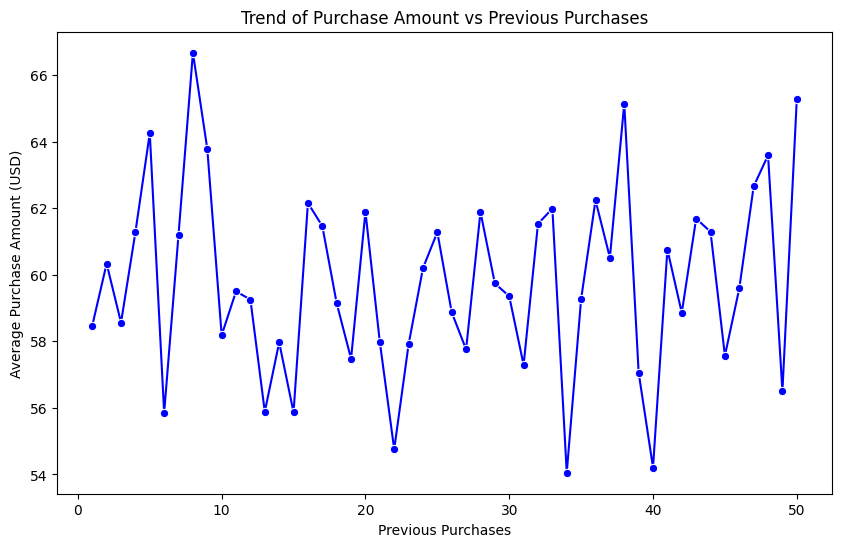

In [64]:
repeat_purchase_stats = shop.groupby('Previous Purchases')['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=repeat_purchase_stats, x='Previous Purchases', y='Purchase Amount (USD)', marker='o', color='b')
plt.title('Trend of Purchase Amount vs Previous Purchases')
plt.xlabel('Previous Purchases')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

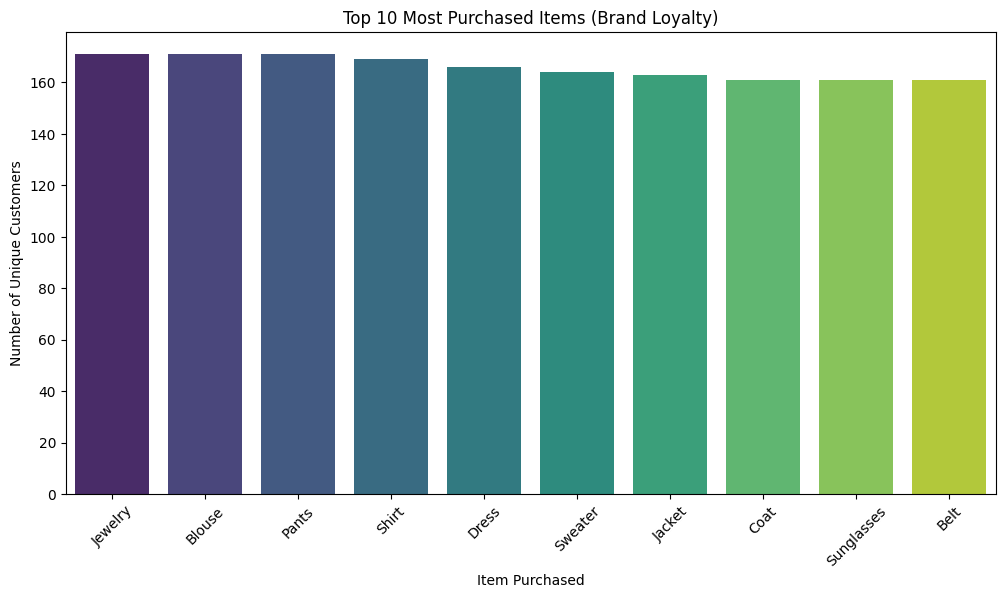

In [65]:
brand_loyalty_stats = shop.groupby('Item Purchased')['Customer ID'].nunique().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=brand_loyalty_stats.sort_values('Customer ID', ascending=False).head(10), 
            x='Item Purchased', y='Customer ID', palette='viridis')
plt.title('Top 10 Most Purchased Items (Brand Loyalty)')
plt.xlabel('Item Purchased')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.show()

## 21. Which group of customers purchases the most expensive items?

In [66]:
numerical_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
categorical_columns = ['Gender', 'Category', 'Location', 'Size', 'Color', 'Season', 
                       'Subscription Status', 'Shipping Type', 'Discount Applied', 
                       'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

pipeline.fit(shop)

shop['Cluster'] = pipeline['kmeans'].labels_

print(shop[['Customer ID', 'Cluster']].head())


   Customer ID  Cluster
0            1        2
1            2        1
2            3        2
3            4        1
4            5        2


In [67]:
cluster_purchase = shop.groupby('Cluster')['Purchase Amount (USD)'].mean()
most_expensive_cluster = cluster_purchase.idxmax()
highest_avg_purchase = cluster_purchase.max()

print(f"Cluster {most_expensive_cluster} has the highest average purchase amount: ${highest_avg_purchase:.2f}")

Cluster 3 has the highest average purchase amount: $64.13


## 22. Identify Key Factors Driving Purchase Amounts

In [68]:
X = pd.get_dummies(shop.drop(['Customer ID', 'Purchase Amount (USD)'], axis=1))
y = shop['Purchase Amount (USD)']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print(importances.head(10))


Previous Purchases                       0.092487
Age                                      0.086635
Review Rating                            0.080818
Cluster                                  0.017017
Size_M                                   0.010311
Season_Spring                            0.010297
Shipping Type_Store Pickup               0.009973
Frequency of Purchases_Every 3 Months    0.009937
Payment Method_Credit Card               0.009919
Season_Fall                              0.009857
dtype: float64


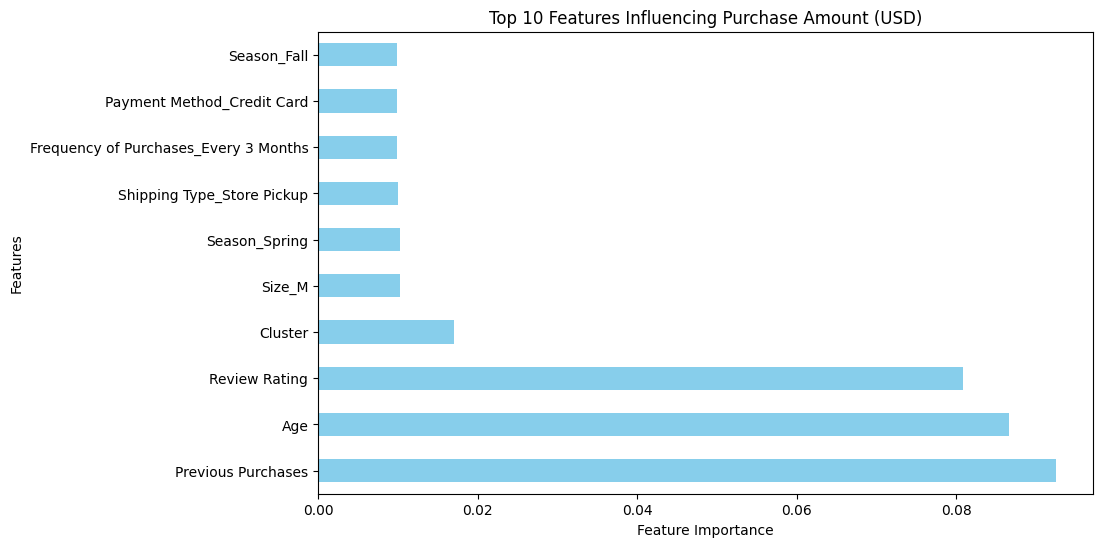

In [69]:
plt.figure(figsize=(10, 6))
importances.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Features Influencing Purchase Amount (USD)')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()
            

# Results:


1. **What is the overall distribution of customer ages in the dataset?**
   - **Result**: The dataset reveals that the average age of customers is 44.06 years. The most significant age group is "Old" (60+ years), consisting of approximately 90,000 customers. "Middle-Aged Adults" (40-59 years) make up about 60,000 individuals, while "Young Adults" (20-39 years) account for 20,000 customers. The smallest group consists of teenagers (under 20), with a minor representation. Age distribution appears relatively consistent from 20 to 70 years, with age 60 being notably more frequent.

2. **How does the average purchase amount vary across different product categories?**
   - **Result**: The average purchase amount varies slightly across categories. Footwear has the highest average purchase at 60.26 dollars, followed by Clothing at 60.03 dollars, and Accessories at 59.84 dollars. Outerwear has the lowest average at 57.17 dollars. Despite slight variations, the overall differences across categories are marginal, suggesting similar spending behavior among customers.

3. **Which gender has the highest number of purchases?**
   - **Result**: Males have a higher total number of purchases than females. However, male customers tend to spend slightly more on average, at 60.25 dollars, compared to 59.54 dollars for female customers. This suggests that while males make more purchases, female customers’ spending is very close on average.

4. **What are the most commonly purchased items in each category?**
   - **Result**: The top items by category include:
     - **Accessories**: Jewelry, Sunglasses, and Belts.
     - **Clothing**: Pants and Blouses.
     - **Footwear**: Sandals and Shoes.
     - **Outerwear**: Jackets and Coats.
   - These items consistently reflect the top choices in their respective categories.

5. **Are there any specific seasons or months where customer spending is significantly higher?**
   - **Result**: While Spring shows a slight edge in purchase frequency, the differences across seasons (Spring, Fall, Winter, and Summer) are minimal, suggesting that customer spending is relatively stable throughout the year.

6. **What is the average rating given by customers for each product category?**
   - **Result**: Footwear receives the highest average rating (3.79), followed by Accessories (3.77), Outerwear (3.75), and Clothing (3.72). This indicates that Footwear generally receives more favorable customer reviews.

7. **Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?**
   - **Result**: Non-subscribed customers tend to spend slightly more on average, with 59.87 dollars compared to 59.49 dollars for subscribed customers. However, the overall spending differences between the two groups are minimal.

8. **Which payment method is the most popular among customers?**
   - **Result**: Debit Cards are the most popular payment method, with an average spend of 60.92 dollars, followed closely by Credit Cards at 60.07 dollars and Bank Transfer at 59.71 dollars.

9. **Do customers who use promo codes tend to spend more than those who don't?**
   - **Result**: Customers not using promo codes spent a higher total amount (133.6K dollars) than promo code users (99.4K dollars). However, promo code users often make larger individual purchases due to perceived discounts, suggesting the effectiveness of promo codes in increasing purchase frequency.

10. **How does the frequency of purchases vary across different age groups?**
    - **Result**: There is a balanced distribution across all purchase frequencies (weekly, bi-weekly, monthly, etc.) across age groups, suggesting that customers of all ages engage similarly in purchasing behavior.

11. **Are there any correlations between the size of the product and the purchase amount?**
    - **Result**: Medium-sized products (M) generate the highest total sales, followed by Large (L), Small (S), and Extra-Large (XL) sizes. This suggests medium sizes are the most popular and should be prioritized in inventory management.

12. **Which shipping type is preferred by customers for different product categories?**
    - **Result**: Shipping preferences vary across categories. Free Shipping is most popular for Footwear and Outerwear, while Standard Shipping is favored for Clothing. Store Pickup is most preferred for Accessories.

13. **How does the presence of a discount affect the purchase decision of customers?**
    - **Result**: Non-discounted items account for a higher total spend (133.6K dollars) compared to discounted items (99.4K dollars). Female customers tend to favor non-discounted products, while male customers show more balance in purchasing both discounted and non-discounted items.

14. **Are there any specific colors that are more popular among customers?**
    - **Result**: Olive, Yellow, and Silver are the most popular colors, followed by Teal and Green. These trends reflect customer preferences for earth and metallic tones.

15. **What is the average number of previous purchases made by customers?**
    - **Result**: On average, customers have made 25.35 previous purchases, indicating a high level of repeat customers and loyalty.

16. **How does the purchase amount differ based on the review ratings given by customers?**
    - **Result**: Higher ratings correlate with slightly higher spending, especially ratings of 5.0 and 4.9. However, the differences across ratings are minimal, suggesting that other factors likely influence customer spending more significantly.

17. **Are there any noticeable differences in purchase behavior between different locations?**
    - **Result**: Customers from Alaska tend to spend the most on average (67.60 dollars), followed by Pennsylvania and Arizona. In contrast, Kansas and Connecticut report the lowest average purchase amounts.

18. **Is there a relationship between customer age and the category of products they purchase?**
    - **Result**: Age does not appear to significantly influence product preferences, as the average ages across categories (Accessories, Clothing, Footwear, and Outerwear) are relatively similar.

19. **How does the average purchase amount differ between male and female customers?**
    - **Result**: Males spend more on average (157.89K dollars) than females (75.19K dollars), with older male customers spending significantly more than females across all age groups.

20. **Are there any noticeable trends in repeat purchases or brand loyalty?**
    - **Result**: Customers who make more repeat purchases tend to spend more per transaction, indicating strong brand loyalty. Products such as Jewelry, Blouses, and Pants drive customer retention and engagement.

21. **Which group of customers purchases the most expensive items?**
    - **Result**: Cluster 3 stands out as the group with the highest average purchase amount, which is 64.13 dollars, highlighting them as purchasers of more expensive items.

22. **Identify Key Factors Driving Purchase Amounts.**

    - **Result**: Key factors driving purchase amounts include previous purchases, age, and review ratings, with repeat customers, certain age groups, and higher ratings leading to higher spending. Customer clusters and factors like size preferences, seasonal trends, shipping method (Store Pickup), and payment method (Credit Card) also contribute.

# Business recommendations:

1. **Age-Based Segmentation Strategy**: The dataset indicates a higher concentration of customers in the "Old" (60+) and "Middle-Aged Adults" (40-59) groups. Marketing efforts should focus on these segments, which demonstrate higher purchasing activity. Meanwhile, strategies should be devised to increase engagement with the underrepresented younger demographics (20-39 and teenagers) through tailored product offerings and promotional campaigns.

2. **Pricing Optimization by Category**: Footwear and Clothing show higher average transaction values, suggesting a greater propensity for spend in these categories. A dynamic pricing strategy, possibly incorporating bundling or tiered pricing, could optimize revenue. Outerwear, which exhibits lower average spend, may benefit from revised pricing strategies or targeted promotions to improve its performance.

3. **Gender-Based Consumer Behavior Insights**: Males, while purchasing more frequently, demonstrate a slightly higher average spend. This insight should inform targeted promotions for male customers, potentially focusing on high-value products or premium offerings. Conversely, female customers, who show near-equal spending patterns, could benefit from personalized marketing approaches to enhance engagement and conversion.

4. **Seasonality-Driven Campaigns**: While seasonal fluctuations in purchase behavior are minimal, a slight increase in transactions during Spring presents an opportunity for seasonal promotions. Strategically timed offers or limited-time discounts during this period could capitalize on this subtle increase in consumer activity.

5. **Product Experience & Customer Satisfaction**: Footwear consistently receives higher ratings, indicating a favorable customer experience. This can be leveraged to enhance brand reputation in this category. To elevate customer satisfaction across other categories, focus on maintaining high product quality, optimizing the user experience, and addressing potential pain points in customer feedback.

6. **Subscription and Promo Code Strategy**: Non-subscribed customers exhibit slightly higher average spend, suggesting potential for increasing subscription conversion rates. Offering tailored subscription benefits, such as early access to sales or personalized recommendations, could increase lifetime value. For promo code users, further analysis of the effectiveness of discounts could identify opportunities to refine promotional tactics without compromising profitability.

7. **Shipping Preference Adjustments**: The preference for Free Shipping in categories like Footwear and Outerwear suggests that extending this offering to other product categories, such as Clothing, could improve conversion rates and overall satisfaction. Analyzing shipping costs and margins could further optimize shipping strategies.

8. **Inventory Allocation by Product Size**: Medium-sized products are the top performers in terms of revenue, indicating demand trends for this product size. Inventory should prioritize these sizes, particularly in Footwear and Clothing categories, to ensure adequate stock levels. Smaller and larger sizes should be optimized according to observed demand patterns.

9. **Discount Effectiveness**: Non-discounted items represent a higher total spend, suggesting that full-price purchases maintain a strong revenue contribution. The discount strategy should focus on enhancing customer retention and driving volume without undercutting full-price sales. Consider targeted discounting strategies to avoid cannibalizing regular price revenue.

10. **Geographic Market Targeting**: Customers from regions such as Alaska, Pennsylvania, and Arizona show higher average spends. These geographic areas should be considered for localized marketing efforts or region-specific offers. Understanding regional preferences can refine product offerings and pricing strategies to maximize revenue from high-spending areas.

11. **High-Value Customer Segmentation**: Cluster 3 customers, who exhibit the highest average spend, represent a key opportunity for high-touch marketing and VIP programs. Tailored loyalty programs or exclusive offers can increase retention within this segment and maximize customer lifetime value.

12. **Customer Retention and Loyalty Initiatives**: The data shows that repeat customers have a significant impact on overall spend. A targeted loyalty program that rewards frequent buyers can enhance customer retention, increase the average transaction value, and drive long-term revenue growth.